In [3]:
#!pip install psycopg2
#import psycopg2
#from sqlalchemy import create_engine

In [4]:
# Establecer los parámetros de conexión
#host = '3.215.166.18'
#port = 5432
#dbname = 'data_elecciones'
#user = 'estudiante'
#password = 'DB-Caoba'

In [5]:
#conn = psycopg2.connect(host=host, port = port, dbname=dbname, user=user, password=password)

In [6]:
#print(conn)

<connection object at 0x0000029136368260; dsn: 'user=estudiante password=xxx dbname=data_elecciones host=3.215.166.18 port=5432', closed: 0>


In [ ]:
# Create a cursor
#cursor = conn.cursor()

# Execute a SQL query to fetch data
#cursor.execute("SELECT * FROM public.data_votacion")

# Fetch the data
#data_votacion = cursor.fetchall()

# Close the cursor and the connection
#cursor.close()
#connection.close()

# Calculate the dimensions
#num_rows = len(data_votacion)
#num_columns = len(data_votacion[0]) if data_votacion else 0

#print(f"Number of rows: {num_rows}")
#print(f"Number of columns: {num_columns}")

In [2]:
# Specify the path to your binary file
#binary_file_path ='C:/Users/mayorj4/Medtronic PLC/Sebastian - General/Maestria/Ciencia de Datos/Ingenial/Binary_data_votacion.csv'


# Use Python to Import the Binary File
#with open(binary_file_path, 'rb') as binary_file:
#    binary_data = binary_file.read()

# Work with the Binary Data
# For example, you can print the first 10 bytes of the binary data
#print(binary_data[:10])

# Close the Binary File
#binary_file.close()

b'2022-CAMAR'


In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: blue; height: 2px;"></div>

## Analisis data_candidatos 

**Cargar Datos**

In [380]:
# Cargar archivo CSV como DataFrame
data_candidatos = pd.read_excel("C:/Users/mayorj4/Medtronic PLC/Sebastian - General/Maestria/Ciencia de Datos/Ingenial/data_candidatos.xlsx")
# Validar si 'listings_Rio' DataFrame no está vacío
if not data_candidatos.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")

Data loaded successfully.


**Dimensiones Dataframe**

In [381]:
# Dimensiones DataFrame:
DimR = data_candidatos.shape[0]
DimC = data_candidatos.shape[1]
DimG = data_candidatos.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 267035 Filas y 15 Columnas. (267035, 15)


**Tipos de Datos**

In [382]:
# Tipos de datos DataFrame
column_data_types = data_candidatos.dtypes
print("Tipos de datos que contiene el DataFrame:")
print(column_data_types)

# Resumen de la cantidad de variables por tipo
data_type_counts = column_data_types.value_counts()
print("\nResumen por tipo:")
print(data_type_counts)

Tipos de datos que contiene el DataFrame:
eleccion        object
corporacion      int64
circ             int64
dep              int64
mun              int64
cod_comuna       int64
cod_par          int64
cod_can          int64
preferente       int64
nombre          object
apellido        object
cedula         float64
genero          object
sorteo         float64
ganador         object
dtype: object

Resumen por tipo:
int64      8
object     5
float64    2
dtype: int64


**Identificar registros incompletos**

In [383]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(data_candidatos)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = data_candidatos.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": data_candidatos.columns,
    "Total Registros":total_registros,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

   Columnas  Total Registros  Cantidad de Registros Nulos  Frecuencia Relativa (%)   Relevancia
   eleccion           267035                          628                 0.235175    Relevante
corporacion           267035                            0                 0.000000    Relevante
       circ           267035                            0                 0.000000    Relevante
        dep           267035                            0                 0.000000    Relevante
        mun           267035                            0                 0.000000    Relevante
 cod_comuna           267035                            0                 0.000000    Relevante
    cod_par           267035                            0                 0.000000    Relevante
    cod_can           267035                            0                 0.000000    Relevante
 preferente           267035                            0                 0.000000    Relevante
     nombre           267035            

Como guia del curso un factor es poco relevante a analizar si los registros incompletos superan el 8%

**Visualizar Muestra**

In [384]:
# Muestra de 5 filas del DataFrame
data_candidatos.sample(5)

,eleccion,corporacion,circ,dep,mun,cod_comuna,cod_par,cod_can,preferente,nombre,apellido,cedula,genero,sorteo,ganador
151339,2019-CONCEJO,4,2,3,31,0,12,5,1,JORGE MARTIN,MOLINARES AYALA,3738427.0,M,4.0,NaN
257400,2019-JAL,5,3,48,1,7,8,84,1,LEITON,MARTINEZ BELLO,71352749.0,M,5.0,NaN
245442,2019-JAL,5,3,9,1,12,15,0,1,PARTIDO COLOMBIA RENACIENTE,NaN,NaN,NaN,1.0,NaN
242549,2019-JAL,5,3,1,1,18,10,0,1,PARTIDO COLOMBIA HUMANA - UNIÃ“N PATRIÃ“TICA,NaN,NaN,NaN,1.0,NaN
69721,2015-CONCEJO,4,2,21,95,0,13,1,1,NELLYS MARINA,MEJIA MORENO,57466277.0,F,7.0,NaN


**Categorias unicas**

In [385]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_candidatos["eleccion"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['2022-SENADO' nan '2022-CAMARA' '2015-GOBERNACION' '2015-CONCEJO'
 '2015-ASAMBLEA' '2015-ALCALDIA' '2015-JAL' '2018-SENADO'
 '2019-GOBERNACION' '2019-ASAMBLEA' '2019-CONCEJO' '2019-JAL'
 '2019-ALCALDIA' '2018-CAMARA' '2022-PRESIDENCIA-1V' '2022-PRESIDENCIA-2V'
 '2018-PRESIDENCIA-1V' '2018-PRESIDENCIA-2V']
Total de categorías únicas: 19


In [386]:
# Obtener las categorías únicas de la columna corporacion 
categorias_unicas = data_candidatos["corporacion"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[1 7 2 8 6 9 4 3 5]
Total de categorías únicas: 9


In [387]:
# Obtener las categorías únicas de la columna circ  
categorias_unicas = data_candidatos["circ"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[0 9 4 1 5 2 3]
Total de categorías únicas: 7


In [388]:
# Obtener las categorías únicas de la columna dep 
categorias_unicas = data_candidatos["dep"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 0  1 15  3  5  7  9 11 12 13 16 25 17 19 21 23 24 26 27 28 29 31 40 44
 46 48 50 52 54 56 60 64 68 72 88]
Total de categorías únicas: 35


In [389]:
# Obtener las categorías únicas de la columna mun  
categorias_unicas = data_candidatos["mun"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[  0 136 145 300  28  35 117  58   1  37 178  97  71 316   9  49  91 225
  46   4   7  10  13  16  19  22  25  31  34  39  40  43  52  55  61  62
  64  67  70  73  76  78  79  80  82  85  88  94 100 103 106 109 112 115
 118 121 124 127 130 133 139 140 142 148 150 151 154 157 160 163 166 168
 169 170 172 175 181 184 187 190 191 192 193 196 199 202 205 206 208 211
 214 217 218 220 223 226 227 229 230 231 232 235 237 238 241 244 247 250
 253 256 259 262 265 268 270 271 274 277 280 282 283 286 289 290 291 292
 293 295 298 301  47   5   6  14  15  18  26  27  41  44  50  59  63  65
  72  84  95 110 113   8  60  68  77 137 161 173 176 179 215 248 249 251
 281 304 307 310 311 313 319 322 324 325 328 331 334 337 340 346 120  29
  53  86  87  98  75 180 200 375 410 415 450 525 600 608 625 650 700 720
 750 800 825 850 875 900  20  23  24  32  33  30 128 132 198 239 318 323
   2  11  12  17  38  48  51  56  74  42  90  96 101 123 125  21  54  36
  69  93  45 119 167 174 194 195

In [390]:
# Obtener las categorías únicas de la columna cod_comuna 
categorias_unicas = data_candidatos["cod_comuna"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 0 16  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 37 31 24 25 18 19
 20 21 22 23 26 27 28 30 29 32 33 34 35 36]
Total de categorías únicas: 38


In [391]:
# Obtener las categorías únicas de la columna cod_par
categorias_unicas = data_candidatos["cod_par"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[  13  255 1140 ...   82 1973 1860]
Total de categorías únicas: 1990


In [392]:
# Obtener las categorías únicas de la columna cod_par  
categorias_unicas = data_candidatos["cod_can"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  11  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100  66 501 201 202 203 502 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 401 402
 403 204 205 206 301 302 303]
Total de categorías únicas: 133


In [393]:
# Obtener las categorías únicas de la columna cod_par  
categorias_unicas = data_candidatos["preferente"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[0 1]
Total de categorías únicas: 2


In [394]:
# Obtener las categorías únicas de la columna nombre
categorias_unicas = data_candidatos["nombre"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['PARTIDO COMUNES' 'JULIAN' 'SANDRA' ... 'PROMOTORES VOTO EN BLANCO'
 'VIVIANE' 'SORREL PARISA']
Total de categorías únicas: 66655


In [395]:
# Obtener las categorías únicas de la columna apellido
categorias_unicas = data_candidatos["apellido"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[nan 'GALLO CUBILLOS' 'RAMIREZ LOBO SILVA' ... 'DE LA CALLE'
 'GALDINO CEDEÃ‘O' 'CAREBILLA CUELLAR']
Total de categorías únicas: 127169


In [396]:
# Obtener las categorías únicas de la columna cedula
categorias_unicas = data_candidatos["cedula"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[      nan 16266146. 63303703. ...  6565585. 52420046. 70566243.]
Total de categorías únicas: 203106


In [397]:
# Obtener las categorías únicas de la columna genero 
categorias_unicas = data_candidatos["genero"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[nan 'M' 'F']
Total de categorías únicas: 3


In [398]:
# Obtener las categorías únicas de la columna genero 
categorias_unicas = data_candidatos["sorteo"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. nan]
Total de categorías únicas: 49


In [399]:
# Obtener las categorías únicas de la columna genero 
categorias_unicas = data_candidatos["ganador"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[nan 'S']
Total de categorías únicas: 2


**Verificar duplicidad**

In [400]:
duplicados = data_candidatos.duplicated(keep=False)

if duplicados.any():
    print("Se encontraron filas duplicadas en el dataset.")
    filas_duplicadas = data_candidatos[duplicados]
    print(filas_duplicadas)
else:
    print("No se encontraron filas duplicadas en el dataset.")

No se encontraron filas duplicadas en el dataset.


**Limpiar registros sin tipo de elección**

In [401]:
# Filtrar los registros donde la columna eleccion sea nula o no tenga valor
data_candidatos_sin_eleccion = data_candidatos.loc[data_candidatos["eleccion"].isnull()]

# Imprimir la tabla
print(data_candidatos_sin_eleccion)

       eleccion  corporacion  circ  dep  mun  cod_comuna  cod_par  cod_can  \
741         NaN            7     9    0    0          16      438      501   
947         NaN            7     9    0    0           1      407        0   
948         NaN            7     9    0    0           1      407      501   
949         NaN            7     9    0    0           1      407      502   
950         NaN            7     9    0    0           1      382        0   
...         ...          ...   ...  ...  ...         ...      ...      ...   
267002      NaN            3     0    0    0           0       12        1   
267003      NaN            3     0    0    0           0      131        2   
267004      NaN            3     0    0    0           0      132        3   
267005      NaN            4     0    0    0           0      133        1   
267006      NaN            4     0    0    0           0      134        2   

        preferente                             nombre          

In [402]:
# Eliminar las filas donde la columna eleccion sea nula o no tenga valor
data_candidatos = data_candidatos.dropna(subset=["eleccion"])

**Identificar registros incompletos**

In [403]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(data_candidatos)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = data_candidatos.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": data_candidatos.columns,
    "Total Registros":total_registros,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

   Columnas  Total Registros  Cantidad de Registros Nulos  Frecuencia Relativa (%)   Relevancia
   eleccion           266407                            0                 0.000000    Relevante
corporacion           266407                            0                 0.000000    Relevante
       circ           266407                            0                 0.000000    Relevante
        dep           266407                            0                 0.000000    Relevante
        mun           266407                            0                 0.000000    Relevante
 cod_comuna           266407                            0                 0.000000    Relevante
    cod_par           266407                            0                 0.000000    Relevante
    cod_can           266407                            0                 0.000000    Relevante
 preferente           266407                            0                 0.000000    Relevante
     nombre           266407            

Completitud columna ganador

In [404]:
import pandas as pd

# Supongamos que 'data_candidatos' es tu DataFrame original

# Filtra las filas donde la columna 'ganador' no es nula
elecciones_con_ganador = data_candidatos[data_candidatos['ganador'].notna()]

# Obtiene las elecciones únicas que tienen algún valor en 'ganador'
elecciones_con_ganador_unicas = elecciones_con_ganador['eleccion'].unique()

# Imprime la lista de elecciones con ganador
print("Elecciones con algún valor en la columna 'ganador':")
print(elecciones_con_ganador_unicas)


Elecciones con algún valor en la columna 'ganador':
['2015-GOBERNACION' '2019-GOBERNACION']


Registros sin cedula

In [405]:
candidatos_sin_cedula = data_candidatos[data_candidatos['cedula'].isnull()]

# Luego, obtén los nombres únicos de los candidatos sin apellido
nombres_unicos_sin_cedula = candidatos_sin_apellido['nombre'].unique()

# Convertir a lista
nombres_unicos_sin_cedula = nombres_unicos_sin_cedula.tolist()

# Obtener el conteo
conteo_nombres_unicos_sin_cedula = len(nombres_unicos_sin_cedula)

# Imprime los nombres únicos con su conteo
print(nombres_unicos_sin_cedula, conteo_nombres_unicos_sin_cedula)

['PARTIDO COMUNES', 'COALICIÃ“N ALIANZA VERDE Y CENTRO ESPERANZA', 'FUERZA CIUDADANA LA FUERZA DEL CAMBIO', 'PARTIDO CAMBIO RADICAL', 'PARTIDO NUEVO LIBERALISMO', 'ESTAMOS LISTAS COLOMBIA', 'MOVIMIENTO UNITARIO METAPOLITICO', 'COALICIÃ“N MIRA -  COLOMBIA JUSTA LIBRES', 'PARTIDO LIBERAL COLOMBIANO', 'MOVIMIENTO GENTE NUEVA', 'MOVIMIENTO DE SALVACIÃ“N NACIONAL', 'PARTIDO CENTRO DEMOCRÃ\x81TICO', 'PARTIDO CONSERVADOR COLOMBIANO', 'PARTIDO DE LA UNIÃ“N POR LA GENTE PARTIDO DE LA U', 'PACTO HISTÃ“RICO', 'ASOCIACIÃ“N DE CABILDOS INDÃ\x8dGENAS POR COLOMBIA', 'DEMOCRACIA DESDE ABAJO LA  PALMA', 'PARTIDO INDÃ\x8dGENA COLOMBIANO P.I.C', 'MOVIMIENTO ALTERNATIVO INDÃ\x8dGENA SOCIAL MAIS', 'MANDATO AMBIENTAL', 'RESGUARDO CAMPO ALEGRE', 'MOVIMIENTO AUTORIDADES INDÃ\x8dGENAS DE COLOMBIA AICO', 'O.S.A ORGANIZACIÃ“N SOCIO-POLÃ\x8dTICA ANCESTRAL', 'PARTIDO ALIANZA VERDE', 'COALICIÃ“N CENTRO ESPERANZA', 'PARTIDO POLÃ\x8dTICO DIGNIDAD', 'GENTE EN MOVIMIENTO', 'PACTO HISTÃ“RICO Y VERDES', 'COALICIÃ“N JUNTO

Registros sin apellido

In [406]:
candidatos_sin_apellido = data_candidatos[data_candidatos['apellido'].isnull()]

# Luego, obtén los nombres únicos de los candidatos sin apellido
nombres_unicos_sin_apellido = candidatos_sin_apellido['nombre'].unique()

# Imprime los nombres únicos
print(nombres_unicos_sin_apellido)

['PARTIDO COMUNES' 'COALICIÃ“N ALIANZA VERDE Y CENTRO ESPERANZA'
 'FUERZA CIUDADANA LA FUERZA DEL CAMBIO' 'PARTIDO CAMBIO RADICAL'
 'PARTIDO NUEVO LIBERALISMO' 'ESTAMOS LISTAS COLOMBIA'
 'MOVIMIENTO UNITARIO METAPOLITICO'
 'COALICIÃ“N MIRA -  COLOMBIA JUSTA LIBRES' 'PARTIDO LIBERAL COLOMBIANO'
 'MOVIMIENTO GENTE NUEVA' 'MOVIMIENTO DE SALVACIÃ“N NACIONAL'
 'PARTIDO CENTRO DEMOCRÃ\x81TICO' 'PARTIDO CONSERVADOR COLOMBIANO'
 'PARTIDO DE LA UNIÃ“N POR LA GENTE PARTIDO DE LA U' 'PACTO HISTÃ“RICO'
 'ASOCIACIÃ“N DE CABILDOS INDÃ\x8dGENAS POR COLOMBIA'
 'DEMOCRACIA DESDE ABAJO LA  PALMA'
 'PARTIDO INDÃ\x8dGENA COLOMBIANO P.I.C'
 'MOVIMIENTO ALTERNATIVO INDÃ\x8dGENA SOCIAL MAIS' 'MANDATO AMBIENTAL'
 'RESGUARDO CAMPO ALEGRE'
 'MOVIMIENTO AUTORIDADES INDÃ\x8dGENAS DE COLOMBIA AICO'
 'O.S.A ORGANIZACIÃ“N SOCIO-POLÃ\x8dTICA ANCESTRAL'
 'PARTIDO ALIANZA VERDE' 'COALICIÃ“N CENTRO ESPERANZA'
 'PARTIDO POLÃ\x8dTICO DIGNIDAD' 'GENTE EN MOVIMIENTO'
 'PACTO HISTÃ“RICO Y VERDES' 'COALICIÃ“N JUNTOS POR CALDA

Generos vacios

In [379]:
candidatos_sin_cedula = data_candidatos[data_candidatos['genero'].isnull()]

# Luego, obtén los nombres únicos de los candidatos sin apellido
nombres_unicos_sin_cedula = candidatos_sin_apellido['nombre'].unique()

# Imprime los nombres únicos
print(nombres_unicos_sin_cedula)

['PARTIDO COMUNES' 'COALICIÃ“N ALIANZA VERDE Y CENTRO ESPERANZA'
 'FUERZA CIUDADANA LA FUERZA DEL CAMBIO' 'PARTIDO CAMBIO RADICAL'
 'PARTIDO NUEVO LIBERALISMO' 'ESTAMOS LISTAS COLOMBIA'
 'MOVIMIENTO UNITARIO METAPOLITICO'
 'COALICIÃ“N MIRA -  COLOMBIA JUSTA LIBRES' 'PARTIDO LIBERAL COLOMBIANO'
 'MOVIMIENTO GENTE NUEVA' 'MOVIMIENTO DE SALVACIÃ“N NACIONAL'
 'PARTIDO CENTRO DEMOCRÃ\x81TICO' 'PARTIDO CONSERVADOR COLOMBIANO'
 'PARTIDO DE LA UNIÃ“N POR LA GENTE PARTIDO DE LA U' 'PACTO HISTÃ“RICO'
 'ASOCIACIÃ“N DE CABILDOS INDÃ\x8dGENAS POR COLOMBIA'
 'DEMOCRACIA DESDE ABAJO LA  PALMA'
 'PARTIDO INDÃ\x8dGENA COLOMBIANO P.I.C'
 'MOVIMIENTO ALTERNATIVO INDÃ\x8dGENA SOCIAL MAIS' 'MANDATO AMBIENTAL'
 'RESGUARDO CAMPO ALEGRE'
 'MOVIMIENTO AUTORIDADES INDÃ\x8dGENAS DE COLOMBIA AICO'
 'O.S.A ORGANIZACIÃ“N SOCIO-POLÃ\x8dTICA ANCESTRAL'
 'PARTIDO ALIANZA VERDE' 'COALICIÃ“N CENTRO ESPERANZA'
 'PARTIDO POLÃ\x8dTICO DIGNIDAD' 'GENTE EN MOVIMIENTO'
 'PACTO HISTÃ“RICO Y VERDES' 'COALICIÃ“N JUNTOS POR CALDA

In [409]:
# Dimensiones DataFrame:
DimR = data_candidatos.shape[0]
DimC = data_candidatos.shape[1]
DimG = data_candidatos.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 265453 Filas y 15 Columnas. (265453, 15)


Eliminar nombres que no cumplen con el estandar

In [410]:

# Definir una lista con los índices de los registros que se quieren eliminar
indices = data_candidatos[data_candidatos["nombre"].isin(["RETIRADO", "REVOCADO"])].index

# Eliminar los registros con la lista de índices
data_candidatos = data_candidatos.drop(indices)

# Obtener el número de registros eliminados
numero_registros_eliminados = len(indices)

# Imprimir el número de registros eliminados
print(numero_registros_eliminados)

0


**Identificar Cedulas duplicadas por elección**

In [411]:
# Agrupar los datos por tipo de elección y cédula
data_candidatos_agrupados = data_candidatos.groupby(["eleccion", "cedula"])

# Filtrar los registros duplicados sin considerar registros nulos o vacíos en 'cedula'
data_candidatos_duplicados = data_candidatos_agrupados.apply(
    lambda x: x.loc[x["cedula"].notna() & (x["cedula"] != "") & x["cedula"].duplicated(keep="first")]
)

# Imprimir los registros duplicados
print(data_candidatos_duplicados)

                                      eleccion  corporacion  circ  dep  mun  \
eleccion     cedula                                                           
2015-CONCEJO 1.055457e+07 41578   2015-CONCEJO            4     2   11   29   
             1.200073e+07 61955   2015-CONCEJO            4     2   17   15   
             3.537770e+07 52648   2015-CONCEJO            4     2   15   67   
             3.681107e+07 72653   2015-CONCEJO            4     2   23   95   
             5.291604e+07 20543   2015-CONCEJO            4     2    1  226   
...                                        ...          ...   ...  ...  ...   
2019-CONCEJO 7.715361e+07 172064  2019-CONCEJO            4     2   12  150   
             1.038810e+09 141837  2019-CONCEJO            4     2    1  106   
             1.038821e+09 141848  2019-CONCEJO            4     2    1  106   
             1.127387e+09 241295  2019-CONCEJO            4     2   72    1   
2019-JAL     9.858445e+07 241911      2019-JAL      

In [412]:

columnas_clave = ['eleccion','corporacion','circ', 'dep', 'mun','cod_comuna','cod_par','cod_can','preferente','nombre','apellido','cedula']

# Usa el método duplicated() para marcar los registros duplicados
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Usa el método sum() para contar los registros duplicados
conteo_duplicados = duplicados.sum()

# Imprime el conteo de registros duplicados
print("Cantidad de registros duplicados:", conteo_duplicados)

# Filtra el DataFrame original para obtener las filas duplicadas
registros_duplicados = data_candidatos[duplicados]

# Imprime los registros duplicados
print(registros_duplicados)

Cantidad de registros duplicados: 0
Empty DataFrame
Columns: [eleccion, corporacion, circ, dep, mun, cod_comuna, cod_par, cod_can, preferente, nombre, apellido, cedula, genero, sorteo, ganador]
Index: []


In [413]:
from tabulate import tabulate

columnas_clave = ['eleccion','nombre','apellido','cedula']
#sin 'preferente', 'cod_can', 'cod_par'

# Usa el método duplicated() para marcar los registros duplicados
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Usa el método sum() para contar los registros duplicados
conteo_duplicados = duplicados.sum()

# Imprime el conteo de registros duplicados
print("Cantidad de registros duplicados:", conteo_duplicados)

# Filtra el DataFrame original para obtener las filas duplicadas
registros_duplicados = data_candidatos[duplicados]

# Imprime los registros duplicados
print(registros_duplicados)

Cantidad de registros duplicados: 31726
           eleccion  corporacion  circ  dep  mun  cod_comuna  cod_par  \
1554    2022-CAMARA            2     1    1    0           0      302   
1568    2022-CAMARA            2     1    1    0           0        8   
1604    2022-CAMARA            2     1    1    0           0        4   
1621    2022-CAMARA            2     1    1    0           0      290   
1639    2022-CAMARA            2     1    1    0           0        1   
...             ...          ...   ...  ...  ...         ...      ...   
266997  2018-CAMARA            2     5   88    0           0       60   
266998  2018-CAMARA            2     5   88    0           0       20   
266999  2018-CAMARA            2     5   88    0           0       20   
267000  2018-CAMARA            2     5   88    0           0       20   
267001  2018-CAMARA            2     5   88    0           0       20   

        cod_can  preferente  \
1554          0           0   
1568          0      

In [414]:
from tabulate import tabulate

columnas_clave = ['eleccion','corporacion','circ', 'dep', 'mun','cod_comuna','nombre','apellido','cedula']

#Sin 'preferente', 'cod_can', 'cod_par'
# Usa el método duplicated() para marcar los registros duplicados
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Usa el método sum() para contar los registros duplicados
conteo_duplicados = duplicados.sum()

# Imprime el conteo de registros duplicados
print("Cantidad de registros duplicados:", conteo_duplicados)

# Filtra el DataFrame original para obtener las filas duplicadas
registros_duplicados = data_candidatos[duplicados]

# Imprime los registros duplicados
print(registros_duplicados)

Cantidad de registros duplicados: 52
            eleccion  corporacion  circ  dep  mun  cod_comuna  cod_par  \
22696   2015-CONCEJO            4     2    1  280           0       13   
22780   2015-CONCEJO            4     2    1  280           0        7   
41553   2015-CONCEJO            4     2   11   29           0        7   
41578   2015-CONCEJO            4     2   11   29           0       10   
46028   2015-CONCEJO            4     2   12  700           0        2   
46074   2015-CONCEJO            4     2   12  700           0        5   
61923   2015-CONCEJO            4     2   17   15           0        4   
61955   2015-CONCEJO            4     2   17   15           0        1   
62685   2015-CONCEJO            4     2   17   37           0        3   
62709   2015-CONCEJO            4     2   17   37           0        5   
72639   2015-CONCEJO            4     2   23   95           0       13   
72653   2015-CONCEJO            4     2   23   95           0        1   
1

In [415]:
from tabulate import tabulate

columnas_clave = ['eleccion','nombre','apellido','cedula','preferente', 'cod_can', 'cod_par']
#sin 'corporacion','circ', 'dep', 'mun','cod_comuna'
# Usa el método duplicated() para marcar los registros duplicados
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Usa el método sum() para contar los registros duplicados
conteo_duplicados = duplicados.sum()

# Imprime el conteo de registros duplicados
print("Cantidad de registros duplicados:", conteo_duplicados)

# Filtra el DataFrame original para obtener las filas duplicadas
registros_duplicados = data_candidatos[duplicados]

# Imprime los registros duplicados
print(registros_duplicados)

Cantidad de registros duplicados: 31540
           eleccion  corporacion  circ  dep  mun  cod_comuna  cod_par  \
1554    2022-CAMARA            2     1    1    0           0      302   
1568    2022-CAMARA            2     1    1    0           0        8   
1604    2022-CAMARA            2     1    1    0           0        4   
1621    2022-CAMARA            2     1    1    0           0      290   
1639    2022-CAMARA            2     1    1    0           0        1   
...             ...          ...   ...  ...  ...         ...      ...   
266997  2018-CAMARA            2     5   88    0           0       60   
266998  2018-CAMARA            2     5   88    0           0       20   
266999  2018-CAMARA            2     5   88    0           0       20   
267000  2018-CAMARA            2     5   88    0           0       20   
267001  2018-CAMARA            2     5   88    0           0       20   

        cod_can  preferente  \
1554          0           0   
1568          0      

In [416]:
import pandas as pd

# Supongamos que 'data_candidatos' es tu DataFrame
columnas_clave = ['eleccion','cod_can','nombre', 'apellido']

# Encuentra los registros duplicados basados en 'nombre' y 'apellido'
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Filtra el DataFrame original para obtener los registros duplicados
registros_duplicados = data_candidatos[duplicados]

# Luego, agrupa por 'nombre' y 'apellido' y cuenta la cantidad de cédulas únicas
conteo_cedulas_por_nombre_apellido = registros_duplicados.groupby(columnas_clave)['cedula'].nunique()

# Filtra aquellos registros que tienen más de una cédula asociada
registros_con_mas_de_una_cedula = registros_duplicados[registros_duplicados.apply(lambda x: x['apellido'] is not None and conteo_cedulas_por_nombre_apellido.get((x['eleccion'], x['cod_can'],x['nombre'],x['apellido']), 0) > 1, axis=1)]

# Imprime los registros con nombre y apellido únicos pero con más de una cédula
print("Registros con más de una cédula:")
print(registros_con_mas_de_una_cedula)

# Obtén el conteo de registros con más de una cédula
conteo_registros_con_mas_de_una_cedula = registros_con_mas_de_una_cedula.shape[0]
print("Cantidad de registros con más de una cédula:", conteo_registros_con_mas_de_una_cedula)

# Exporta estos registros a un archivo Excel
registros_con_mas_de_una_cedula.to_excel("registros_con_mas_de_una_cedula.xlsx", index=False)


Registros con más de una cédula:
             eleccion  corporacion  circ  dep  mun  cod_comuna  cod_par  \
87032    2015-CONCEJO            4     2   27  217           0       12   
88318    2015-CONCEJO            4     2   28   55           0       12   
110202   2015-CONCEJO            4     2   64   28           0       10   
110639   2015-CONCEJO            4     2   72    1           0       13   
136727  2019-ALCALDIA            3     2   31   13           0       17   
137404  2019-ALCALDIA            3     2   64    2           0      460   
142959   2019-CONCEJO            4     2    1  139           0        2   
162337   2019-CONCEJO            4     2    7  215           0        4   
166032   2019-CONCEJO            4     2    9   34           0     1219   
179043   2019-CONCEJO            4     2   15   16           0        8   
187513   2019-CONCEJO            4     2   15  289           0        3   
191223   2019-CONCEJO            4     2   17   34           0     

In [417]:
# Supongamos que 'data_candidatos' es tu DataFrame original
columnas_clave = ['eleccion', 'cod_can', 'nombre', 'apellido']

# Encuentra los registros duplicados basados en 'nombre' y 'apellido'
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Filtra el DataFrame original para obtener los registros duplicados
registros_duplicados = data_candidatos[duplicados]

# Luego, agrupa por 'nombre' y 'apellido' y cuenta la cantidad de cédulas únicas
conteo_cedulas_por_nombre_apellido = registros_duplicados.groupby(columnas_clave)['cedula'].nunique()

# Función para obtener el primer valor encontrado en un grupo de registros duplicados
def obtener_primer_valor_grupo(group):
    return group.iloc[0]

# Reemplazar los registros duplicados por el primer valor encontrado en cada grupo
registros_no_duplicados = registros_duplicados.groupby(columnas_clave, group_keys=False).apply(obtener_primer_valor_grupo)

# Actualiza el DataFrame original 'data_candidatos' con los registros sin duplicados
data_candidatos = data_candidatos.drop(registros_duplicados.index)  # Elimina los registros duplicados
data_candidatos = pd.concat([data_candidatos, registros_no_duplicados], ignore_index=True)  # Agrega los registros sin duplicados

# Imprime el DataFrame actualizado
print("DataFrame actualizado:")
print(data_candidatos)

DataFrame actualizado:
           eleccion  corporacion  circ  dep  mun  cod_comuna  cod_par  \
0       2022-SENADO            1     0    0    0           0       13   
1       2022-SENADO            1     0    0    0           0       13   
2       2022-SENADO            1     0    0    0           0       13   
3       2022-SENADO            1     0    0    0           0       13   
4       2022-SENADO            1     0    0    0           0       13   
...             ...          ...   ...  ...  ...         ...      ...   
233917     2019-JAL            5     3    5    1           1     1292   
233918     2019-JAL            5     3   15  247           6       13   
233919     2019-JAL            5     3    1    1           1       15   
233920     2019-JAL            5     3    1    1           1        8   
233921  2022-CAMARA            2     1    9    0           0      241   

        cod_can  preferente  \
0             0           0   
1             1           0   
2      

In [418]:
import pandas as pd

# Supongamos que 'data_candidatos' es tu DataFrame
columnas_clave = ['eleccion','cod_can','nombre', 'apellido']

# Encuentra los registros duplicados basados en 'nombre' y 'apellido'
duplicados = data_candidatos.duplicated(subset=columnas_clave, keep=False)

# Filtra el DataFrame original para obtener los registros duplicados
registros_duplicados = data_candidatos[duplicados]

# Luego, agrupa por 'nombre' y 'apellido' y cuenta la cantidad de cédulas únicas
conteo_cedulas_por_nombre_apellido = registros_duplicados.groupby(columnas_clave)['cedula'].nunique()

# Filtra aquellos registros que tienen más de una cédula asociada
registros_con_mas_de_una_cedula = registros_duplicados[registros_duplicados.apply(lambda x: x['apellido'] is not None and conteo_cedulas_por_nombre_apellido.get((x['eleccion'], x['cod_can'],x['nombre'],x['apellido']), 0) > 1, axis=1)]

# Imprime los registros con nombre y apellido únicos pero con más de una cédula
print("Registros con más de una cédula:")
print(registros_con_mas_de_una_cedula)

# Obtén el conteo de registros con más de una cédula
conteo_registros_con_mas_de_una_cedula = registros_con_mas_de_una_cedula.shape[0]
print("Cantidad de registros con más de una cédula:", conteo_registros_con_mas_de_una_cedula)


Registros con más de una cédula:
Empty DataFrame
Columns: []
Index: []
Cantidad de registros con más de una cédula: 0


In [419]:
import pandas as pd

# Supongamos que 'data_candidatos' es tu DataFrame original

# Filtra los registros que tienen un valor en la columna 'cedula' y la columna 'apellido'
registros_con_cedula_y_apellido = data_candidatos[data_candidatos['cedula'].notna() & data_candidatos['apellido'].notna()]

# Agrupa los registros por 'eleccion', 'nombre', 'apellido' y 'cedula', y obtén los géneros únicos en cada grupo
generos_por_grupo = registros_con_cedula_y_apellido.groupby(['eleccion', 'nombre', 'apellido', 'cedula'])['genero'].unique()

# Filtra los grupos donde hay más de un género asignado
grupos_con_mas_de_un_genero = generos_por_grupo[generos_por_grupo.apply(lambda x: len(x) > 1)]

# Muestra los grupos con más de un género asignado
print("Grupos con más de un género asignado:")
print(grupos_con_mas_de_un_genero)


Grupos con más de un género asignado:
Series([], Name: genero, dtype: object)


In [420]:
import pandas as pd

# Supongamos que 'data_candidatos' es tu DataFrame original

# Primero, filtra las filas donde la columna 'cedula' no es nula o vacía
data_filtrada = data_candidatos[data_candidatos['cedula'].notna() & data_candidatos['cedula'] != '']

# Luego, agrupa por las columnas 'eleccion', 'nombre', 'apellido', 'cedula' y cuenta cuántos 'cod_can' únicos hay en cada grupo
conteo_cod_can = data_filtrada.groupby(['eleccion', 'nombre', 'apellido', 'cedula'])['cod_can'].nunique().reset_index()

# Finalmente, filtra las filas donde el conteo de 'cod_can' sea mayor que 1, lo que significa que tienen más de un 'cod_can' asignado
registros_con_mas_de_un_cod_can = conteo_cod_can[conteo_cod_can['cod_can'] > 1]

# Imprime los registros que cumplen con esta condición
print(registros_con_mas_de_un_cod_can)
# Calcula el número de registros en 'registros_con_mas_de_un_cod_can'
numero_de_registros = len(registros_con_mas_de_un_cod_can)

# Imprime el número de registros
print("Número de registros con más de un 'cod_can' asignado:", numero_de_registros)

            eleccion              nombre            apellido        cedula  \
15450   2015-CONCEJO             ARMENIA     CHIRIPUA GARCIA  3.681107e+07   
25000   2015-CONCEJO      DIANA CRISTINA            QUINTERO  5.291604e+07   
31151   2015-CONCEJO             ENALVIS   CARDENAS CASTILLO  5.606998e+07   
31642   2015-CONCEJO      ERIKA PATRICIA     BELTRAN MURILLO  1.045488e+09   
47174   2015-CONCEJO       JESUS URMEDIS              APONZA  1.055457e+07   
47651   2015-CONCEJO          JHON JAIRO       BOTERO URREGO  1.200073e+07   
47937   2015-CONCEJO              JHONIS  QUIÃ‘ONEZ CORRALES  7.719398e+07   
65043   2015-CONCEJO        LUIS RODOLFO     VIVERO MOSQUERA  8.226031e+07   
97675       2015-JAL       ADRIANA MARIA      PUERTA VAQUERO  1.002429e+09   
97758       2015-JAL         ALBA YANETH     JIMENEZ CABANZO  5.229911e+07   
98385       2015-JAL           ANA MARIA        CAMACHO POLO  4.093470e+07   
100342      2015-JAL     DEIBER ENRIQUES     BENJUMEA SUAREZ  1.

In [421]:
import pandas as pd

# Supongamos que 'data_candidatos' es tu DataFrame original

# Primero, filtra las filas donde la columna 'cedula' no es nula o vacía
data_filtrada = data_candidatos[data_candidatos['cedula'].notna() & data_candidatos['cedula'] != '']

# Luego, agrupa por las columnas 'eleccion', 'nombre', 'apellido', 'cedula' y cuenta cuántos 'cod_can' únicos hay en cada grupo
conteo_cod_can = data_filtrada.groupby(['eleccion', 'nombre', 'apellido', 'cedula'])['cod_par'].nunique().reset_index()

# Finalmente, filtra las filas donde el conteo de 'cod_can' sea mayor que 1, lo que significa que tienen más de un 'cod_can' asignado
registros_con_mas_de_un_cod_can = conteo_cod_can[conteo_cod_can['cod_par'] > 1]

# Imprime los registros que cumplen con esta condición
print(registros_con_mas_de_un_cod_can)
# Calcula el número de registros en 'registros_con_mas_de_un_cod_can'
numero_de_registros = len(registros_con_mas_de_un_cod_can)

# Imprime el número de registros
print("Número de registros con más de un 'cod_par' asignado:", numero_de_registros)

            eleccion              nombre            apellido        cedula  \
15450   2015-CONCEJO             ARMENIA     CHIRIPUA GARCIA  3.681107e+07   
25000   2015-CONCEJO      DIANA CRISTINA            QUINTERO  5.291604e+07   
31151   2015-CONCEJO             ENALVIS   CARDENAS CASTILLO  5.606998e+07   
31642   2015-CONCEJO      ERIKA PATRICIA     BELTRAN MURILLO  1.045488e+09   
47174   2015-CONCEJO       JESUS URMEDIS              APONZA  1.055457e+07   
47651   2015-CONCEJO          JHON JAIRO       BOTERO URREGO  1.200073e+07   
47937   2015-CONCEJO              JHONIS  QUIÃ‘ONEZ CORRALES  7.719398e+07   
65043   2015-CONCEJO        LUIS RODOLFO     VIVERO MOSQUERA  8.226031e+07   
97675       2015-JAL       ADRIANA MARIA      PUERTA VAQUERO  1.002429e+09   
97758       2015-JAL         ALBA YANETH     JIMENEZ CABANZO  5.229911e+07   
98385       2015-JAL           ANA MARIA        CAMACHO POLO  4.093470e+07   
100342      2015-JAL     DEIBER ENRIQUES     BENJUMEA SUAREZ  1.

<div style="background-color: blue; height: 2px;"></div>

In [378]:
candidatos_sin_cedula = data_candidatos[data_candidatos['cedula'].isnull()]

# Luego, obtén los nombres únicos de los candidatos sin cédula
nombres_unicos_sin_cedula = candidatos_sin_cedula['nombre'].unique()

# Cuenta los valores únicos de nombres
conteo_nombres_unicos_sin_cedula = len(nombres_unicos_sin_cedula)

# Imprime el conteo de nombres únicos
print("Cantidad de nombres únicos sin cédula:", conteo_nombres_unicos_sin_cedula)

Cantidad de nombres únicos sin cédula: 676


## Analisis data_divipol

In [429]:
# Cargar archivo CSV como DataFrame
data_divipol = pd.read_excel("C:/Users/mayorj4/Medtronic PLC/Sebastian - General/Maestria/Ciencia de Datos/Ingenial/data_divipol.xlsx")
# Validar si 'listings_Rio' DataFrame no está vacío
if not data_candidatos.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")

Data loaded successfully.


In [430]:
# Dimensiones DataFrame:
DimR = data_divipol.shape[0]
DimC = data_divipol.shape[1]
DimG = data_divipol.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 85327 Filas y 19 Columnas. (85327, 19)


In [427]:
# Tipos de datos DataFrame
column_data_types = data_divipol.dtypes
print("Tipos de datos que contiene el DataFrame:")
print(column_data_types)

# Resumen de la cantidad de variables por tipo
data_type_counts = column_data_types.value_counts()
print("\nResumen por tipo:")
print(data_type_counts)

Tipos de datos que contiene el DataFrame:
cod_eleccion     object
dep             float64
nom_dep          object
mun             float64
nom_mun          object
zz              float64
pp               object
nom_puesto       object
ind             float64
pot_hom         float64
pot_muj         float64
mesas           float64
cod_comuna      float64
nom_comuna       object
dir_puesto       object
latitud         float64
longitud        float64
zonificado       object
ZONIFICADO      float64
dtype: object

Resumen por tipo:
float64    11
object      8
dtype: int64


In [431]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["cod_eleccion"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['2022-PRES-1V' '2022-CONGRES' '2022-PRES-2V' '2018-PRES' '2015-LOCALES'
 '2019-LOCALES' '2018-CONGRES']
Total de categorías únicas: 7


In [432]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["dep"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[25 31 88  7 64  9 26  3 29  1  5 11 27 24 23 17 12 13 16 28 19 21 60 44
 46 48 52 56 68 72 54 15 40 50]
Total de categorías únicas: 34


In [433]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["nom_dep"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['NORTE DE SAN' 'VALLE' 'CONSULADOS' 'BOYACA' 'PUTUMAYO' 'CALDAS'
 'QUINDIO' 'ATLANTICO' 'TOLIMA' 'ANTIOQUIA' 'BOLIVAR' 'CAUCA' 'SANTANDER'
 'RISARALDA' 'NARIÃ‘O' 'CHOCO' 'CESAR' 'CORDOBA' 'BOGOTA D.C.' 'SUCRE'
 'HUILA' 'MAGDALENA' 'AMAZONAS' 'CAQUETA' 'CASANARE' 'LA GUAJIRA' 'META'
 'SAN ANDRES' 'VAUPES' 'VICHADA' 'GUAVIARE' 'CUNDINAMARCA' 'ARAUCA'
 'GUAINIA']
Total de categorías únicas: 34


In [434]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["mun"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 54   1  61 100 115  64 109 274   2 112  52 202  67  55  10  20  50  28
  60  19  80 118   7  25 205  43 220  46  86  91 139  58  85 215 217  76
 285  37  39 290  13 300 305 280 360  15 410  82 495 500  88  94  73 121
  22 160 505 199 181   3   4  40   5   6  34   8  97 120 130 135 140 155
   9 165 170 190 250 275 315 325 330 335 340 350 355 370 375 380 435 440
 445 455 460 465 470 490  31 515 535 560 580 590 620 625 635 655 805 665
 670 675 680 683 685 688 690 700 745 755 760 765 770 785 815 106 200  11
  12  17  14  16  18 525  21  62  53  23  24  26 187  27 600  32  29  30
  79  70  33  35  36  41 320  38 840  42  44  45  47  48  49  51  59  56
 103  78 124 127 154 253 259 270 117 151 214 166 262 247 271 133 142 328
 125 193 520  87 415 150 223 268 282 283 289 137 163 295 251 198 229 307
 334  75 304  95  90 136 175 260  89 540 640  83 405 184 232 291 298  84
 148 176 226 650 750 800 244  98  93  71  74 169 172 208 830 865 277 292
  63 110 113 241 286 180 450 900

In [435]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["nom_mun"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['LOS PATIOS' 'CALI' 'OCAÃ‘A' ... 'LA PEÃ‘A' 'SALDAÃ‘A' 'BARRANCOMINAS']
Total de categorías únicas: 1122


In [436]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["zz"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 1  2 90 99 98  5  6  0  3  4  7  8 11  9 10 40 12 13 14 15 16 17 18 19
 20 60 35 50 55 65 70 30 57 59 25 45 52 75 21 22 23 24 26 27 28 29 31 32
 33]
Total de categorías únicas: 49


In [437]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["pp"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[1 2 3 4 5 6 28 30 25 9 7 11 13 17 18 21 26 27 32 33 60 70 75 85 50 8 10
 37 38 39 40 41 42 43 15 20 35 45 55 65 0 58 52 53 54 72 80 34 73 29 22 23
 48 61 74 90 96 'A1' 'A2' 12 24 19 82 83 14 16 31 36 44 46 47 49 51 56 57
 59 62 63 64 66 67 68 69 71 76 77 78 79 81 84 86 87 88 89 91 92 93 94 95
 97 98 99 'A3' 'A4' 'B1' 'B2' 'A5' 'B3' 'B4' 'B5' 'C1' 'C2' 'D1' 'D2' 'S8'
 'F6' 'F7' 'H1' 'K1' 'N9' 'P2' 'S6' 'W4' 'W5' 'W7' 'Y9' 'D4' 'D9' 'E7'
 'H6' 'H9' 'N8' 'P3' 'P5' 'P8' 'Q2' 'Q6' 'U6' 'W8' 'X1' 'A7' 'A9' 'B8'
 'B9' 'D6' 'E9' 'F3' 'H2' 'J3' 'K7' 'K9' 'L4' 'L6' 'M9' 'PO' 'R9' 'V9'
 'W3' 'Y7' 'Z3' 'A8' 'C6' 'L1' 'L7' 'R1' 'R2' 'R3' 'T9' 'V3' 'V6' 'W9'
 'E5' 'G9' 'J9' 'K3' 'P1' 'T3' 'U3' 'W2' 'W6' 'Z1' 'Z5' 'A6' 'D3' 'I9'
 'K6' 'M1' 'N6' 'W1' 'B6' 'E3' 'F9' 'H3' 'M3' 'P4' 'X3' 'E4' 'Q3' 'R4'
 'J6' 'B7' 'Y5']
Total de categorías únicas: 202


In [438]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["nom_puesto"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['COMFANORTE' 'COLEGIO BAS. LA SABANA' 'COLEGIO FE Y ALEGRIA' ...
 'I.E. EZEQUIEL MORENO Y DIAZ SD MORICHAL'
 'IE NUESTRA SEÃ‘ORA DE LOS DOLORES DE MANA'
 'IE EZEQUIEL MORENO Y DIAZ SD BELLO HORIZ']
Total de categorías únicas: 12484


In [441]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["ind"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[4 1 5 0 3 7 8 6 9 2]
Total de categorías únicas: 10


In [440]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["pot_hom"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[6047 6175 3311 ... 9673 9199 6283]
Total de categorías únicas: 8310


In [442]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["pot_muj"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 5520  5781  3870 ... 10870  9871  8312]
Total de categorías únicas: 8293


In [443]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["mesas"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 30  34  19  21  18  17  15  16  11  12  36  40  23  26  22  24   9   8
   5   4   1  20   6  38   3   7  29  37  25  27  14  10   2  13  32  28
  35  31  33  57  49  43  39  42  48  52  41  44  55  51  54  45  50  47
  76  92  63  74  46  65 100  82  59  73  60  84  71  69  61  70  53  58
  64  56  86 103  67 282 306  75  97  78  68  90  91 106  62 111 361  72
  66  80  81  87  83  85 101 123  89 431 110 112 325 105 124  93 127 394]
Total de categorías únicas: 108


In [444]:
# Calcular la media (promedio) de la variable "mesas"
media = data_divipol["mesas"].mean()

# Calcular la mediana de la variable "mesas"
mediana = data_divipol["mesas"].median()

# Calcular la moda de la variable "mesas"
moda = data_divipol["mesas"].mode()[0]  # Puede haber más de una moda, por lo que se toma la primera

# Calcular la varianza de la variable "mesas"
varianza = data_divipol["mesas"].var()

# Calcular la desviación estándar de la variable "mesas"
desviacion_estandar = data_divipol["mesas"].std()

# Calcular el rango de la variable "mesas"
rango = data_divipol["mesas"].max() - data_divipol["mesas"].min()

# Imprimir los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Varianza: {varianza}")
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Rango: {rango}")

Media: 8.493806180927491
Mediana: 3.0
Moda: 1
Varianza: 130.7902688110499
Desviación Estándar: 11.436357322637743
Rango: 430


In [446]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
# Calcular la asimetría de la variable "mesas"
asimetria = skew(data_divipol["mesas"])

# Calcular la kurtosis de la variable "mesas"
kurt = kurtosis(data_divipol["mesas"])

# Imprimir los resultados
print(f"Asimetría: {asimetria}")
print(f"Kurtosis: {kurt}")

# Interpretar los resultados
if asimetria > 0:
    conclusion_asimetria = "La distribución es asimétrica positiva (cola derecha)."
elif asimetria < 0:
    conclusion_asimetria = "La distribución es asimétrica negativa (cola izquierda)."
else:
    conclusion_asimetria = "La distribución es simétrica."

if kurt > 3:
    conclusion_kurtosis = "La distribución es leptocúrtica (más puntiaguda)."
elif kurt < 3:
    conclusion_kurtosis = "La distribución es platicúrtica (más achatada)."
else:
    conclusion_kurtosis = "La distribución es mesocúrtica (normal)."

print(conclusion_asimetria)
print(conclusion_kurtosis)

Asimetría: 4.003723706668104
Kurtosis: 71.82149405464558
La distribución es asimétrica positiva (cola derecha).
La distribución es leptocúrtica (más puntiaguda).


In [447]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["cod_comuna"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[ 0. nan  9.  6.  4.  7.  8. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23.  2.  3.  1.  5. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]
Total de categorías únicas: 48


In [448]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["nom_comuna"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[nan 'CORREGIMIENTO BUENAVISTA' 'COMUNA 6 CIUDADELA NORTE'
 'COMUNA4 SUROCCIDENTAL ADOLFO M' 'CORREGIMIENTO AGUAS CLARAS'
 'CORREGIMIENTO AGUA DE LA VIRGE' 'CORREGIMIENTO OTARE'
 'CORREGIMIENTO CERRO LAS FLORES' 'CORREGIMIENTO ESPIRITUSANTO'
 'CORREG ALTO PATIOS-PALOGRANDE' 'CORREGIMIENTO LA ERMITA'
 'CORREGIMIENTO LA FLORESTA' 'CORREGIMIENTO LAS CHIRCAS'
 'CORREGIMIENTO LAS LISCAS' 'CORREG LLANO DE LOS TRIGOS'
 'CORREGIMIENTO MARIQUITA' 'CORREGIMIENTO PORTACHUELO'
 'CORREGIMIENTO PUEBLO NUEVO' 'CORREGIMIENTO QUEBRADA LA ESPE'
 'CORREGIMIENTO VENADILLO' 'COMUNA2 NORORIENTAL CRISTO REY'
 'COMUNA 3 SURORIENTAL OLAYA H.' 'COMUNA 1 CENTRAL JOSE E. CARO'
 'COMUNA 5 FCO FERNANDEZ DE CONT' 'COMUNA 2  SUR' 'COMUNA 3 ORIENTE'
 'COMUNA 1 NORTE' 'CORREGIMIENTO PIÃ‘UÃ‘A BLANCO'
 'CIRCUNSCRIPCIÃ“N 11 PUTUMAYO' 'CORREGIMIENTO LA CARMELITA'
 'CORREGIMIENTO SANTANA' 'CORREGIMIENTO  TETEYE'
 'CORREGIMIENTO VILLA VICTORIA' 'LOCALIDAD NO.1 SUR OCCIDENTE'
 'COMUNA 1 CENTENARIO' 'COMUNA 

In [449]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["dir_puesto"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['KM 3 VÃ\x8dA PAMPLONA' nan 'AV 4 No. 36-70 . LA SABANA' ...
 'CLL 4 NO 7-50 ESC GENERAL SANTANDER'
 'COL BACHILLERATO ARCENIO GUTIERREZ BARBOSA' 'CORREGIMIENTO ZAPATOSA']
Total de categorías únicas: 10004


In [450]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["latitud"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[7.85683648e+15 7.84536199e+15 7.83696876e+15 ... 8.87527616e+15
 8.74650000e+15 9.00766000e+15]
Total de categorías únicas: 11714


In [451]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["longitud"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[-7.25008738e+16 -7.25011999e+16 -7.25100560e+16 ... -7.37025634e+16
 -7.37724990e+16 -7.37516980e+16]
Total de categorías únicas: 11604


In [452]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["zonificado"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['S' nan]
Total de categorías únicas: 2


In [453]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = data_divipol["ZONIFICADO"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[nan]
Total de categorías únicas: 1


**Calidad de los datos**

In [455]:
duplicados = data_candidatos.duplicated(keep=False)

if duplicados.any():
    print("Se encontraron filas duplicadas en el dataset.")
    filas_duplicadas = data_candidatos[duplicados]
    numero_duplicados = duplicados.sum()
    print(f"Número de filas duplicadas: {numero_duplicados}")
    print(filas_duplicadas)
else:
    print("No se encontraron filas duplicadas en el dataset.")


No se encontraron filas duplicadas en el dataset.


In [454]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(data_divipol)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = data_divipol.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": data_divipol.columns,
    "Total Registros":total_registros,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

    Columnas  Total Registros  Cantidad de Registros Nulos  Frecuencia Relativa (%)   Relevancia
cod_eleccion            85327                            0                 0.000000    Relevante
         dep            85327                            0                 0.000000    Relevante
     nom_dep            85327                            0                 0.000000    Relevante
         mun            85327                            0                 0.000000    Relevante
     nom_mun            85327                            0                 0.000000    Relevante
          zz            85327                            0                 0.000000    Relevante
          pp            85327                            0                 0.000000    Relevante
  nom_puesto            85327                            0                 0.000000    Relevante
         ind            85327                            0                 0.000000    Relevante
     pot_hom            85327 

Filtrar por registros vacios de nom_comuna

In [459]:
# Filtrar los registros donde la columna "nom_comuna" sea nula o vacía
registros_nulos = data_divipol[data_divipol["nom_comuna"].isnull() | (data_divipol["nom_comuna"] == '')]

# Obtener 100 registros aleatorios de entre los registros filtrados
registros_aleatorios = registros_nulos.sample(n=100, random_state=42)

# Imprimir los registros aleatorios
print(registros_aleatorios)


       cod_eleccion  dep     nom_dep  mun                 nom_mun  zz  pp  \
84311  2022-PRES-1V   88  CONSULADOS  360          ESTADOS UNIDOS  60   5   
76195  2022-PRES-1V   21   MAGDALENA   78  SANTA BARBARA DE PINTO  99  10   
21933     2018-PRES   23     NARIÃ‘O   94                MOSQUERA  99  10   
35985  2022-PRES-2V    3   ATLANTICO   52                 SOLEDAD   6   3   
21379     2018-PRES   17       CHOCO    7                  BAGADO  99  13   
...             ...  ...         ...  ...                     ...  ..  ..   
16925  2022-PRES-2V   27   SANTANDER   45               CIMITARRA   2   1   
80068  2022-PRES-1V   23     NARIÃ‘O  124               SAN PABLO  99  60   
50427  2015-LOCALES   64    PUTUMAYO   13           SAN FRANCISCO  99  60   
24437     2018-PRES   17       CHOCO    2           ATRATO (YUTO)  99  30   
24183     2018-PRES   52        META   45            PUERTO LOPEZ  99   2   

                                 nom_puesto  ind  pot_hom  pot_muj  mesas  

In [463]:
# Filtrar los registros donde la columna "nom_comuna" sea nula o vacía
registros_nulos = data_divipol[data_divipol["dir_puesto"].isnull() | (data_divipol["dir_puesto"] == '')]

# Obtener 100 registros aleatorios de entre los registros filtrados
registros_aleatorios = registros_nulos.sample(n=100, random_state=42)

# Imprimir los registros aleatorios
print(registros_aleatorios)

       cod_eleccion  dep       nom_dep  mun       nom_mun  zz  pp  \
68608  2019-LOCALES   15  CUNDINAMARCA   31        CAJICA   2   5   
3679   2022-CONGRES   16   BOGOTA D.C.    1  BOGOTA. D.C.  11  70   
23795     2018-PRES    9        CALDAS   22    BELALCAZAR  99  18   
43296  2015-LOCALES    7        BOYACA  304        TIBANA  99  29   
59646  2018-CONGRES    1     ANTIOQUIA  192       NECOCLI  99  10   
...             ...  ...           ...  ...           ...  ..  ..   
44941  2018-CONGRES   31         VALLE   79       PALMIRA   4   6   
19494  2022-PRES-2V   88    CONSULADOS  250        CANADA   3  84   
66298  2018-CONGRES   46      CASANARE   40       AGUAZUL   1   1   
44616  2015-LOCALES   13       CORDOBA   10        CERETE   1   1   
75584  2022-CONGRES    7        BOYACA   73         CHITA  99   4   

                           nom_puesto  ind  pot_hom  pot_muj  mesas  \
68608  SALON COMUNAL BARRIO GRANJITAS    1      263      216      2   
3679                MAXIMINO 

In [464]:
# Filtrar los registros donde la columna "nom_comuna" sea nula o vacía
registros_nulos = data_divipol[data_divipol["zonificado"].isnull() | (data_divipol["zonificado"] == '')]

# Obtener 100 registros aleatorios de entre los registros filtrados
registros_aleatorios = registros_nulos.sample(n=100, random_state=42)

# Imprimir los registros aleatorios
print(registros_aleatorios)

       cod_eleccion  dep       nom_dep  mun                   nom_mun  zz  pp  \
23830     2018-PRES   11         CAUCA   53                   PADILLA  99   3   
2645   2022-PRES-1V   16   BOGOTA D.C.    1              BOGOTA. D.C.   7  23   
14675  2022-CONGRES   25  NORTE DE SAN   34                   DURANIA  99  11   
48119  2015-LOCALES   25  NORTE DE SAN   93                      TIBU  99  45   
46176  2015-LOCALES   17         CHOCO   13                   CONDOTO  99  30   
...             ...  ...           ...  ...                       ...  ..  ..   
57242  2019-LOCALES   28         SUCRE  100                    OVEJAS  99  22   
83561  2022-PRES-1V    1     ANTIOQUIA  298                   YOLOMBO  99   3   
47405  2015-LOCALES   23       NARIÃ‘O  112  ROBERTO PAYAN (SAN JOSE)  99   9   
24579     2018-PRES   27     SANTANDER  175                SAN ANDRES  99   9   
46719  2015-LOCALES   21     MAGDALENA   40                    GUAMAL  99  25   

                  nom_puest

In [467]:
# Contar registros con latitud pero sin longitud
latitud_sin_longitud = data_divipol[(data_divipol["latitud"].notnull()) & (data_divipol["longitud"].isnull())]
contador_latitud_sin_longitud = len(latitud_sin_longitud)

# Contar registros con longitud pero sin latitud
longitud_sin_latitud = data_divipol[(data_divipol["latitud"].isnull()) & (data_divipol["longitud"].notnull())]
contador_longitud_sin_latitud = len(longitud_sin_latitud)

# Contar registros sin latitud ni longitud
sin_latitud_ni_longitud = data_divipol[(data_divipol["latitud"].isnull()) & (data_divipol["longitud"].isnull())]
contador_sin_latitud_ni_longitud = len(sin_latitud_ni_longitud)

# Imprimir los resultados
print(f"Registros con latitud pero sin longitud: {contador_latitud_sin_longitud}")
print(f"Registros con longitud pero sin latitud: {contador_longitud_sin_latitud}")
print(f"Registros sin latitud ni longitud: {contador_sin_latitud_ni_longitud}")

Registros con latitud pero sin longitud: 0
Registros con longitud pero sin latitud: 0
Registros sin latitud ni longitud: 47799


In [468]:
# Filtrar los registros donde la columna "nom_comuna" sea nula o vacía
registros_nulos = data_divipol[(data_divipol["latitud"].isnull()) & (data_divipol["longitud"].isnull())]

# Obtener 100 registros aleatorios de entre los registros filtrados
registros_aleatorios = registros_nulos.sample(n=100, random_state=42)

# Imprimir los registros aleatorios
print(registros_aleatorios)

       cod_eleccion  dep       nom_dep  mun              nom_mun  zz  pp  \
42469  2015-LOCALES   31         VALLE   55              FLORIDA  99  25   
66097  2018-CONGRES   31         VALLE   91           ROLDANILLO  99  18   
11351  2015-LOCALES   29        TOLIMA    1               IBAGUE   1   2   
67549  2018-CONGRES   88    CONSULADOS  620            NICARAGUA   5  83   
64970  2018-CONGRES   28         SUCRE   30    COLOSO (RICAURTE)  99  73   
...             ...  ...           ...  ...                  ...  ..  ..   
21896     2018-PRES   17         CHOCO   35  RIO QUITO (PAIMADO)  99  20   
42878  2015-LOCALES    5       BOLIVAR   95   SANTA ROSA DEL SUR  99  25   
64584  2018-CONGRES   25  NORTE DE SAN   22           CONVENCION  99  19   
29634     2018-PRES   27     SANTANDER   19      BARRANCABERMEJA   2   2   
27174     2018-PRES   31         VALLE   79              PALMIRA   1   3   

                         nom_puesto  ind  pot_hom  pot_muj  mesas  cod_comuna  \
42469 

In [470]:
# Filtrar los registros donde la columna "nom_comuna" sea nula o vacía
registros= data_divipol[data_divipol["mesas"]>100]

# Imprimir los registros aleatorios
print(registros)

       cod_eleccion  dep      nom_dep  mun       nom_mun  zz  pp  \
3471   2022-CONGRES   16  BOGOTA D.C.    1  BOGOTA. D.C.  11   1   
4627   2022-PRES-2V   16  BOGOTA D.C.    1  BOGOTA. D.C.  90   1   
4628   2022-CONGRES   16  BOGOTA D.C.    1  BOGOTA. D.C.  90   1   
4629   2022-PRES-1V   16  BOGOTA D.C.    1  BOGOTA. D.C.  90   1   
30961     2018-PRES   16  BOGOTA D.C.    1  BOGOTA. D.C.   1  12   
31081     2018-PRES   16  BOGOTA D.C.    1  BOGOTA. D.C.  11   1   
31157     2018-PRES   16  BOGOTA D.C.    1  BOGOTA. D.C.  90   1   
45398  2015-LOCALES   16  BOGOTA D.C.    1  BOGOTA. D.C.   1   1   
45409  2015-LOCALES   16  BOGOTA D.C.    1  BOGOTA. D.C.   1  12   
45748  2015-LOCALES   16  BOGOTA D.C.    1  BOGOTA. D.C.  11   1   
46010  2015-LOCALES   16  BOGOTA D.C.    1  BOGOTA. D.C.  90   1   
54051  2019-LOCALES   16  BOGOTA D.C.    1  BOGOTA. D.C.   1  12   
54508  2019-LOCALES   16  BOGOTA D.C.    1  BOGOTA. D.C.  11   1   
54856  2019-LOCALES   16  BOGOTA D.C.    1  BOGO

In [472]:
# Calcular la suma de "mesas" para cada combinación de "cod_eleccion" y "nom_dep"
suma_mesas_por_depeleccion = data_divipol.groupby(['cod_eleccion'])['mesas'].sum()

print(suma_mesas_por_depeleccion)

cod_eleccion
2015-LOCALES     96303
2018-CONGRES    104126
2018-PRES        97663
2019-LOCALES    107919
2022-CONGRES    112012
2022-PRES-1V    103364
2022-PRES-2V    103364
Name: mesas, dtype: int64


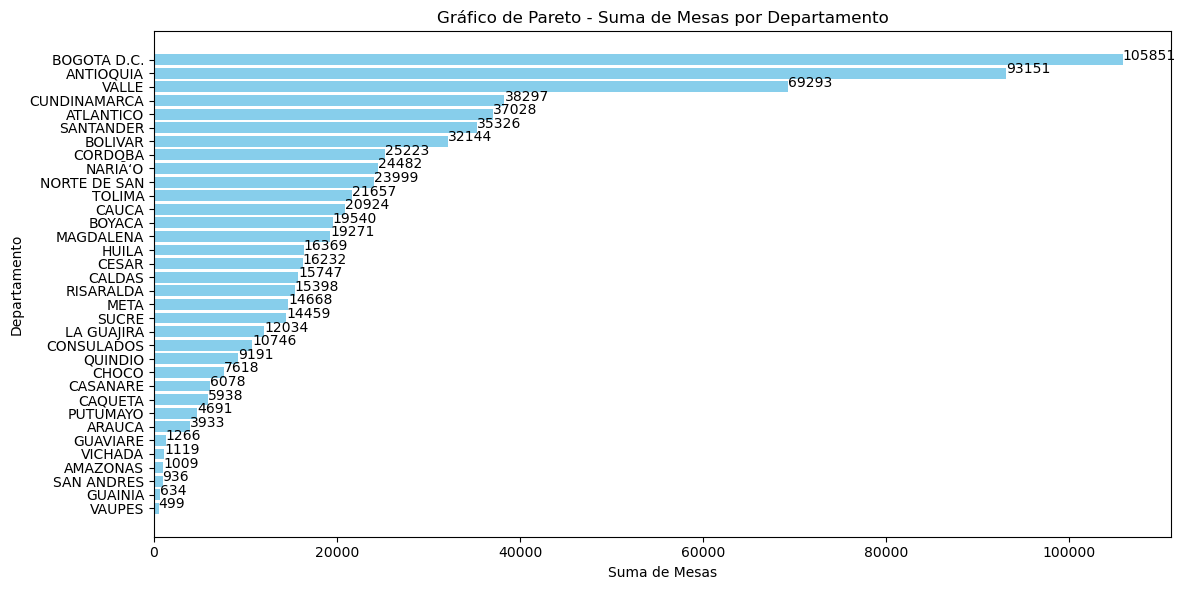

In [474]:
# Calcular la suma de mesas por 'nom_dep'
suma_mesas_por_departamento = data_divipol.groupby('nom_dep')['mesas'].sum().reset_index()

# Ordenar el DataFrame por la suma de mesas en orden descendente
suma_mesas_por_departamento = suma_mesas_por_departamento.sort_values(by='mesas', ascending=False)

# Crear el gráfico de Pareto
plt.figure(figsize=(12, 6))
plt.barh(suma_mesas_por_departamento['nom_dep'], suma_mesas_por_departamento['mesas'], color='skyblue')
plt.title('Gráfico de Pareto - Suma de Mesas por Departamento')
plt.xlabel('Suma de Mesas')
plt.ylabel('Departamento')

# Agregar etiquetas de valor en las barras
for index, value in enumerate(suma_mesas_por_departamento['mesas']):
    plt.text(value, index, str(value))

plt.gca().invert_yaxis()  # Invertir el eje Y para que el departamento con más mesas esté en la parte superior

plt.tight_layout()
plt.show()

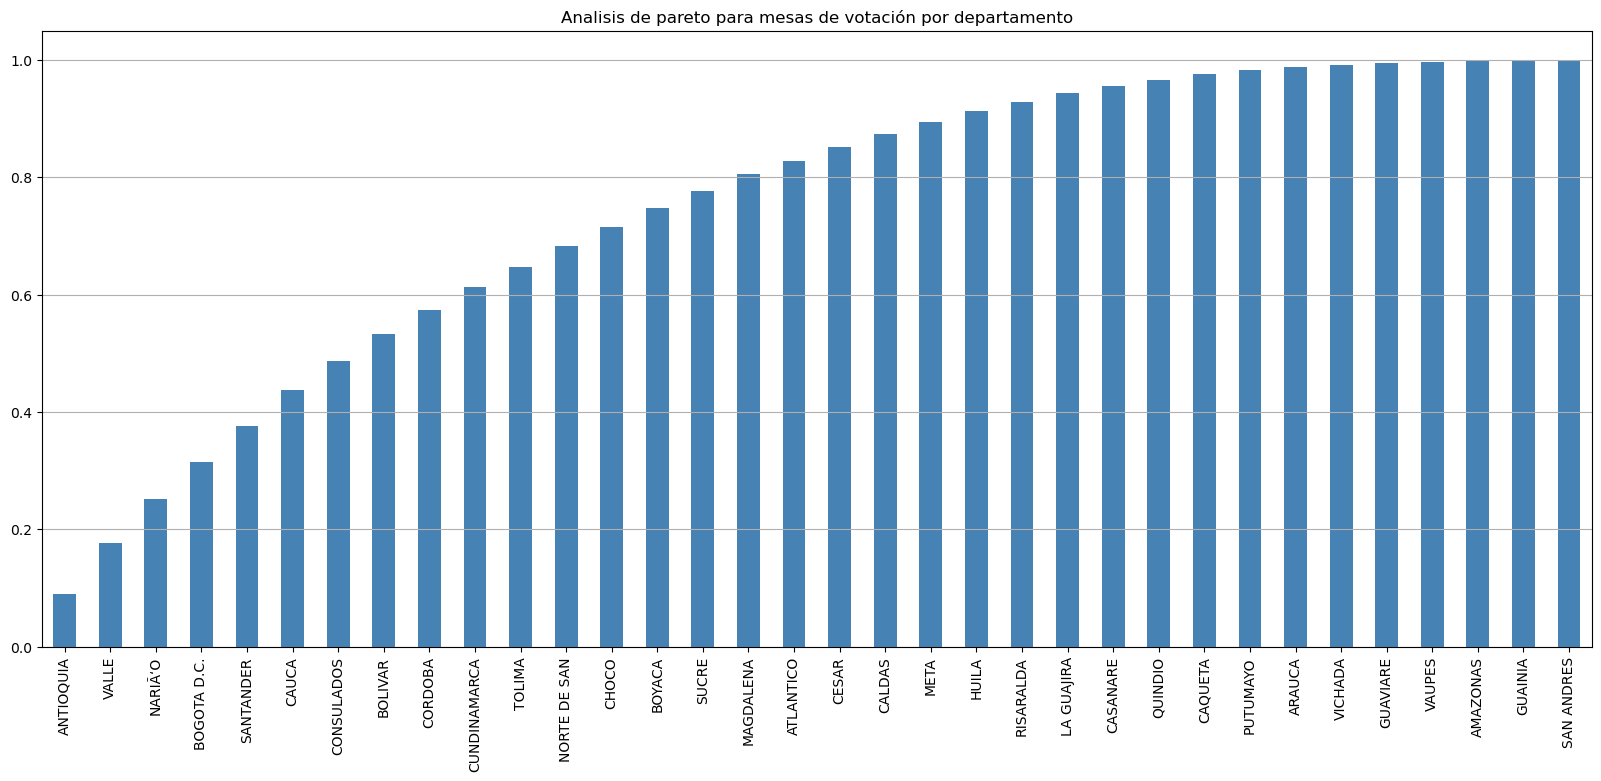

In [505]:
Department_Cumsum = data_divipol["nom_dep"].value_counts(normalize=True).cumsum()
plt.figure(figsize=(20, 8))
Department_Cumsum.plot(kind="bar", color="steelblue")
plt.title("Analisis de pareto para mesas de votación por departamento")
plt.grid(axis="y")
plt.show()

In [476]:
# Calcular la suma de mesas por 'nom_dep'
suma_mesas_por_departamento = data_divipol.groupby('nom_dep')['mesas'].sum().reset_index()

# Ordenar el DataFrame por la suma de mesas en orden descendente
suma_mesas_por_departamento = suma_mesas_por_departamento.sort_values(by='mesas', ascending=False)

# Calcular el porcentaje acumulado
suma_mesas_por_departamento['porcentaje_acumulado'] = (suma_mesas_por_departamento['mesas'].cumsum() / suma_mesas_por_departamento['mesas'].sum()) * 100

# Encontrar los departamentos que representan el 80% de concentración de mesas
umbral = 80
departamentos_concentrados = suma_mesas_por_departamento[suma_mesas_por_departamento['porcentaje_acumulado'] <= umbral]

print(departamentos_concentrados)

         nom_dep   mesas  porcentaje_acumulado
4    BOGOTA D.C.  105851             14.605154
1      ANTIOQUIA   93151             27.457982
31         VALLE   69293             37.018921
15  CUNDINAMARCA   38297             42.303081
3      ATLANTICO   37028             47.412146
28     SANTANDER   35326             52.286371
5        BOLIVAR   32144             56.721550
14       CORDOBA   25223             60.201780
22       NARIÃ‘O   24482             63.579767
23  NORTE DE SAN   23999             66.891112
30        TOLIMA   21657             69.879310
10         CAUCA   20924             72.766371
6         BOYACA   19540             75.462469
20     MAGDALENA   19271             78.121451


In [480]:
# Agrupar por "nom_dep" y "cod_eleccion" y calcular la suma de las "mesas"
tabla_suma_mesas = data_divipol.groupby(['nom_dep', 'cod_eleccion'])['mesas'].sum().reset_index()

# Mostrar la tabla resultante
print(tabla_suma_mesas)


      nom_dep  cod_eleccion  mesas
0    AMAZONAS  2015-LOCALES    134
1    AMAZONAS  2018-CONGRES    140
2    AMAZONAS     2018-PRES    130
3    AMAZONAS  2019-LOCALES    153
4    AMAZONAS  2022-CONGRES    160
..        ...           ...    ...
231   VICHADA     2018-PRES    144
232   VICHADA  2019-LOCALES    161
233   VICHADA  2022-CONGRES    177
234   VICHADA  2022-PRES-1V    164
235   VICHADA  2022-PRES-2V    164

[236 rows x 3 columns]


In [482]:
import pandas as pd
from scipy.stats import kruskal

# Obtén la lista de valores únicos en la columna "cod_eleccion"
valores_cod_eleccion = data_divipol['cod_eleccion'].unique()

# Realiza la prueba de Kruskal-Wallis para cada valor único en "cod_eleccion"
for cod_eleccion_especifico in valores_cod_eleccion:
    # Filtra el DataFrame para el valor de "cod_eleccion" específico
    data_cod_eleccion = tabla_suma_mesas[tabla_suma_mesas['cod_eleccion'] == cod_eleccion_especifico]
    
    # Realiza la prueba de Kruskal-Wallis
    estadistica, p_valor = kruskal(*[grupo['mesas'] for _, grupo in data_cod_eleccion.groupby('nom_dep')])
    
    # Imprime los resultados para este valor de "cod_eleccion"
    print(f"Resultado Kruskal-Wallis para cod_eleccion={cod_eleccion_especifico}:")
    print(f"Estadística: {estadistica}")
    print(f"P-valor: {p_valor}")



Resultado Kruskal-Wallis para cod_eleccion=2022-PRES-1V:
Estadística: 33.0
P-valor: 0.46725288137290993
Resultado Kruskal-Wallis para cod_eleccion=2022-CONGRES:
Estadística: 33.0
P-valor: 0.46725288137290993
Resultado Kruskal-Wallis para cod_eleccion=2022-PRES-2V:
Estadística: 33.0
P-valor: 0.46725288137290993
Resultado Kruskal-Wallis para cod_eleccion=2018-PRES:
Estadística: 33.0
P-valor: 0.46725288137290993
Resultado Kruskal-Wallis para cod_eleccion=2015-LOCALES:
Estadística: 32.0
P-valor: 0.4667448913877211
Resultado Kruskal-Wallis para cod_eleccion=2019-LOCALES:
Estadística: 32.0
P-valor: 0.4667448913877211
Resultado Kruskal-Wallis para cod_eleccion=2018-CONGRES:
Estadística: 33.0
P-valor: 0.46725288137290993


In [484]:
conteo_consulados = data_divipol[data_divipol['nom_dep'] == 'CONSULADOS'].groupby('cod_eleccion').size().reset_index(name='conteo')
print(conteo_consulados)

   cod_eleccion  conteo
0  2018-CONGRES     942
1     2018-PRES     942
2  2022-CONGRES     250
3  2022-PRES-1V    1000
4  2022-PRES-2V    1000


In [487]:
import pandas as pd
from scipy.stats import kruskal

# Filtra los datos para 'nom_dep' igual a 'CONSULADOS'
datos_consulados = data_divipol[data_divipol['nom_dep'] == 'CONSULADOS']

# Obtén la lista de valores únicos en la columna "cod_eleccion" para CONSULADOS
valores_cod_eleccion_consulados = datos_consulados['cod_eleccion'].unique()

# Itera a través de los valores únicos en "cod_eleccion" para CONSULADOS
for cod_eleccion_especifico in valores_cod_eleccion_consulados:
    # Filtra los datos para el valor de "cod_eleccion" específico
    datos_cod_eleccion = datos_consulados[datos_consulados['cod_eleccion'] == cod_eleccion_especifico]
    
    # Realiza la prueba de Kruskal-Wallis para evaluar la variación de las mesas
    estadistica, p_valor = kruskal(*[grupo['mesas'] for _, grupo in datos_cod_eleccion.groupby('nom_dep')])
    
    # Imprime los resultados para este valor de "cod_eleccion" en CONSULADOS
    print(f"Resultado Kruskal-Wallis para cod_eleccion={cod_eleccion_especifico} en CONSULADOS:")
    print(f"Estadística: {estadistica}")
    print(f"P-valor: {p_valor}")


ValueError: Need at least two groups in stats.kruskal()

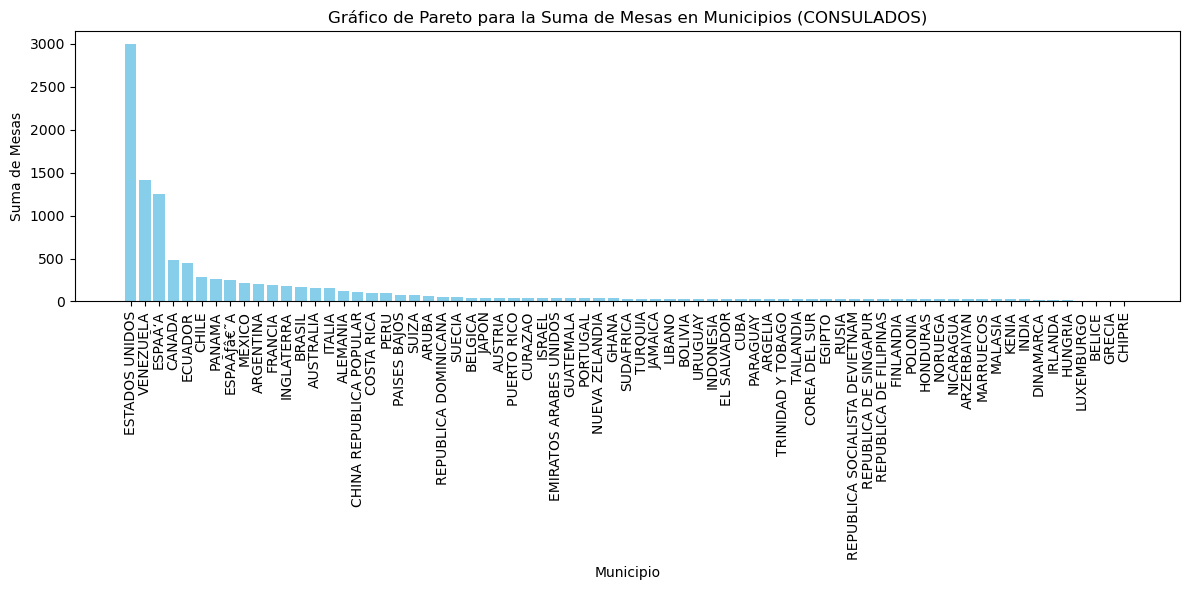

In [485]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para 'nom_dep' igual a 'CONSULADOS'
datos_consulados = data_divipol[data_divipol['nom_dep'] == 'CONSULADOS']

# Calcular la suma de 'mesas' por 'nom_mun'
suma_mesas_por_municipio = datos_consulados.groupby('nom_mun')['mesas'].sum().reset_index()

# Ordenar los datos en orden descendente
suma_mesas_por_municipio = suma_mesas_por_municipio.sort_values(by='mesas', ascending=False)

# Crear un gráfico de Pareto
plt.figure(figsize=(12, 6))
plt.bar(suma_mesas_por_municipio['nom_mun'], suma_mesas_por_municipio['mesas'], color='skyblue')
plt.xlabel('Municipio')
plt.ylabel('Suma de Mesas')
plt.title('Gráfico de Pareto para la Suma de Mesas en Municipios (CONSULADOS)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


In [486]:
import pandas as pd

# Filtrar los datos para 'nom_dep' igual a 'CONSULADOS'
datos_consulados = data_divipol[data_divipol['nom_dep'] == 'CONSULADOS']

# Calcular la suma total de mesas en CONSULADOS
suma_total_mesas = datos_consulados['mesas'].sum()

# Ordenar los datos en orden descendente por suma de mesas
datos_consulados = datos_consulados.sort_values(by='mesas', ascending=False)

# Inicializar variables
municipios_seleccionados = []
suma_acumulada = 0
umbral = 0.8 * suma_total_mesas  # Establecer el umbral del 80%

# Iterar a través de los municipios para encontrar los que representan el 80% o más
for index, row in datos_consulados.iterrows():
    suma_acumulada += row['mesas']
    municipios_seleccionados.append(row['nom_mun'])
    if suma_acumulada >= umbral:
        break

# Imprimir los municipios seleccionados
print("Municipios que representan el 80% de la suma de mesas en CONSULADOS:")
print(municipios_seleccionados)


Municipios que representan el 80% de la suma de mesas en CONSULADOS:
['VENEZUELA', 'VENEZUELA', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESPAÃ‘A', 'ESPAÃ‘A', 'ESPAÃƒâ€˜A', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESPAÃ‘A', 'ESPAÃ‘A', 'ESPAÃ‘A', 'ESTADOS UNIDOS', 'VENEZUELA', 'ESPAÃ‘A', 'ESPAÃ‘A', 'ESPAÃ‘A', 'ESPAÃƒâ€˜A', 'ESTADOS UNIDOS', 'ESPAÃ‘A', 'VENEZUELA', 'ESPAÃ‘A', 'ESTADOS UNIDOS', 'VENEZUELA', 'ESTADOS UNIDOS', 'ESPAÃƒâ€˜A', 'VENEZUELA', 'ESTADOS UNIDOS', 'VENEZUELA', 'VENEZUELA', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESPAÃ‘A', 'PANAMA', 'PANAMA', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'INGLATERRA', 'ESTADOS UNIDOS', 'ARGENTINA', 'ESTADOS UNIDOS', 'PANAMA', 'ESTADOS UNIDOS', 'ESPAÃ‘A', 'ESPAÃ‘A', 'ESTADOS UNIDOS', 'ESPAÃ‘A', 'ESTADOS UNIDOS', 'ESTADOS UNIDOS', 'VENEZUELA', 'ESTADOS UNIDOS', 'INGLATERRA', 'INGLATERRA', 'PANAMA', 'VENEZUELA', 'VENEZUELA', 'ESPAÃ‘A', 'ESTADOS UNIDOS',

<div style="background-color: blue; height: 2px;"></div>

## Analisis 2022_partidos 

In [492]:
# Cargar archivo CSV como DataFrame
partidos_2022 = pd.read_excel("C:/Users/mayorj4/Medtronic PLC/Sebastian - General/Maestria/Ciencia de Datos/Ingenial/partidos_2022.xlsx")
# Validar si 'listings_Rio' DataFrame no está vacío
if not partidos_2022.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")
    

Data loaded successfully.


In [493]:
# Dimensiones DataFrame:
DimR = partidos_2022.shape[0]
DimC = partidos_2022.shape[1]
DimG = partidos_2022.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 341 Filas y 3 Columnas. (341, 3)


In [494]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = partidos_2022["cod_par"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
[   2    3    4    5    6    7    8    9   11   13   14   15   16   17
   19   20   21   22   23   25   26   27   28   29   37   38   39   40
   41   42   43   44   45   46   57   58   59   60   67   68   69   70
   77   78   79   81   84   85   87   89   91   92   93   97   99  100
  101  102  103  104  112  114  116  151  156  157  166  167  168  177
  181  182  183  184  186  201  202  203  211  221  222  223  224  225
  226  227  231  232  233  234  235  241  242  243  244  245  246  251
  252  253  254  255  257  258  261  262  263  264  265  266  267  271
  273  281  282  290  291  292  294  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  318  319  320  321
  322  323  324  325  326  328  329  330  331  332  333  334  335  336
  337  338  339  340  341  342  343  344  345  346  347  348  350  351
  352  353  354  355  356  357  358  359  360  361  362  363  364  365
  366  367  368  369  370  371  372  373  374  375  376  3

In [495]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = partidos_2022["nom_partido"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['PARTIDO CONSERVADOR COLOMBIANO' 'PARTIDO CAMBIO RADICAL'
 'PARTIDO ALIANZA VERDE'
 'MOVIMIENTO AUTORIDADES INDÃ\x8dGENAS DE COLOMBIA AICO'
 'PARTIDO ALIANZA SOCIAL INDEPENDIENTE ASI' 'PARTIDO POLÃ\x8dTICO MIRA'
 'PARTIDO DE LA UNIÃ“N POR LA GENTE PARTIDO DE LA U'
 'PARTIDO POLO DEMOCRÃ\x81TICO ALTERNATIVO'
 'PARTIDO CENTRO DEMOCRÃ\x81TICO' 'PARTIDO COMUNES'
 'PARTIDO COLOMBIA JUSTA LIBRES' 'PARTIDO COLOMBIA RENACIENTE'
 'ALIANZA DEMOCRÃ\x81TICA AMPLIA ADA' 'PARTIDO POLÃ\x8dTICO DIGNIDAD'
 'PARTIDO NUEVO LIBERALISMO' 'ALIANZA NACIONAL AFROCOLOMBIANA'
 'PALENQUE DE LA VEREDA LAS TRECIENTAS Y DEL MUNICIPIO DE GALAPA'
 'CONSEJO COMUNITARIO UNIÃ“N PATÃ\x8dA VIEJO'
 'CONSEJO COMUNITARIO MAYOR DE CERTEGUI'
 'CONSEJO COMUNITARIO DE COMUNIDADES NEGRAS DE CAMPO HERMOSO'
 'O.S.A ORGANIZACIÃ“N SOCIO-POLÃ\x8dTICA ANCESTRAL'
 'CONSEJO COMUNITARIO BOCAS DEL ATRATO Y LEONCITO'
 'ASOCIACIÃ“N AFRODESCENDIENTES DE ARBOLETES AFRODESAR' 'AFROMUTATA'
 'CONSEJO COMUNITARIO DE LA COSTA PA

In [496]:
# Obtener las categorías únicas de la columna eleccion
categorias_unicas = partidos_2022["otro"].unique()

# Contar el número total de categorías únicas
total_categorias_unicas = len(categorias_unicas)

# Imprimir las categorías únicas y el total
print("Categorías únicas:")
print(categorias_unicas)
print("Total de categorías únicas:", total_categorias_unicas)

Categorías únicas:
['N']
Total de categorías únicas: 1


In [497]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(partidos_2022)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = partidos_2022.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": partidos_2022.columns,
    "Total Registros":total_registros,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

   Columnas  Total Registros  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
    cod_par              341                            0                      0.0  Relevante
nom_partido              341                            0                      0.0  Relevante
       otro              341                            0                      0.0  Relevante

Columnas Descartadas:
[]


In [498]:
# Tipos de datos DataFrame
column_data_types = partidos_2022.dtypes
print("Tipos de datos que contiene el DataFrame:")
print(column_data_types)

# Resumen de la cantidad de variables por tipo
data_type_counts = column_data_types.value_counts()
print("\nResumen por tipo:")
print(data_type_counts)

Tipos de datos que contiene el DataFrame:
cod_par         int64
nom_partido    object
otro           object
dtype: object

Resumen por tipo:
object    2
int64     1
dtype: int64


In [499]:
# Muestra de 5 filas del DataFrame
partidos_2022.sample(5)

,cod_par,nom_partido,otro
254,438,FUNDACIÃ“N DIOCESANA COMPARTIR,N
243,427,FUNDACIÃ“N PROCRECER,N
275,459,ASOCIACIÃ“N AGROPECUARIOS TRONCAL DEL CARIBE,N
114,282,COALICIÃ“N CENTRO ESPERANZA,N
116,291,PACTO HISTÃ“RICO ALIANZA VERDE,N


In [500]:
duplicados = partidos_2022.duplicated(keep=False)

if duplicados.any():
    print("Se encontraron filas duplicadas en el dataset.")
    filas_duplicadas = partidos_2022[duplicados]
    print(filas_duplicadas)
else:
    print("No se encontraron filas duplicadas en el dataset.")

No se encontraron filas duplicadas en el dataset.


In [501]:
# Comprueba si la relación es uno a uno
is_one_to_one = partidos_2022.groupby('nom_partido')['cod_par'].nunique().max() == 1

if is_one_to_one:
    print("La relación entre 'nom_partido' y 'cod_par' es uno a uno.")
else:
    print("La relación entre 'nom_partido' y 'cod_par' no es uno a uno.")

La relación entre 'nom_partido' y 'cod_par' no es uno a uno.


In [502]:
# Comprueba si la relación es uno a uno
is_one_to_one = partidos_2022.groupby('cod_par')['nom_partido'].nunique().max() == 1

if is_one_to_one:
    print("La relación entre 'cod_par' y 'nom_partido' es uno a uno.")
else:
    print("La relación entre 'cod_par' y 'nom_partido' no es uno a uno.")

La relación entre 'cod_par' y 'nom_partido' es uno a uno.


Existe mas de un codigo unico para un partido

In [503]:
# Obtener valores únicos y sus conteos
valores_unicos = partidos_2022['nom_partido'].unique()
conteo = partidos_2022['nom_partido'].value_counts()

# Crear un DataFrame para valores únicos
df_valores_unicos = pd.DataFrame({'Nom_Partido': valores_unicos})

# Crear un DataFrame para conteos
df_conteo = pd.DataFrame({'Nom_Partido': conteo.index, 'Conteo': conteo.values})

# Unir los DataFrames por la columna 'Nom_Partido'
tabla_unificada = df_valores_unicos.merge(df_conteo, on='Nom_Partido')

# Imprimir la tabla unificada
print(tabla_unificada)

                                           Nom_Partido  Conteo
0                       PARTIDO CONSERVADOR COLOMBIANO       1
1                               PARTIDO CAMBIO RADICAL       1
2                                PARTIDO ALIANZA VERDE       1
3    MOVIMIENTO AUTORIDADES INDÃGENAS DE COLOMBIA ...       2
4             PARTIDO ALIANZA SOCIAL INDEPENDIENTE ASI       1
..                                                 ...     ...
316                EL CAMBIO SOY YO MOVIMIENTO DIGITAL       1
317                            ESTAMOS LISTAS COLOMBIA       1
318              FUERZA CIUDADANA LA FUERZA DEL CAMBIO       1
319                             MOVIMIENTO GENTE NUEVA       1
320    FUERZA CIUDADANA LA FUERZA DEL CAMBIO MAGDALENA       1

[321 rows x 2 columns]


In [504]:
registros_duplicados = partidos_2022.duplicated(subset='nom_partido', keep=False)

# Luego, puedes contar cuántos registros están duplicados:
conteo_registros_duplicados = registros_duplicados.sum()

# Imprimir el resultado
print(f"Total de registros duplicados en la columna 'nom_partido': {conteo_registros_duplicados}")

Total de registros duplicados en la columna 'nom_partido': 26


In [62]:
# Obtener valores únicos y sus conteos
valores_unicos = partidos_2022['otro'].unique()
conteo = partidos_2022['otro'].value_counts()

# Crear un DataFrame para valores únicos
df_valores_unicos = pd.DataFrame({'Otro_': valores_unicos})

# Crear un DataFrame para conteos
df_conteo = pd.DataFrame({'Otro_': conteo.index, 'Conteo': conteo.values})

# Unir los DataFrames por la columna 'Nom_Partido'
tabla_unificada = df_valores_unicos.merge(df_conteo, on='Otro_')

# Imprimir la tabla unificada
print(tabla_unificada)

  Otro_  Conteo
0     N     336


In [63]:
columnas_a_eliminar = ['cod_par', 'otro']  # Reemplaza 'otra_columna' con el nombre de la columna que deseas eliminar

partidos_2022 = partidos_2022.drop(columns=columnas_a_eliminar)

In [64]:
partidos_2022 = partidos_2022.drop_duplicates()

In [65]:
partidos_2022.sample(5)

,nom_partido
61,CONSEJO COMUNITARIO DE VUELTA MANZA
256,ASPROÑAME
275,ASOCIACIÓN AGROPECUARIOS TRONCAL DEL CARIBE
272,ASPROPISAT
187,ASOCIACIÓN FAMILIAR Y AMIGOS DEL CHOCO - ASFAC...


In [66]:
# Dimensiones DataFrame:
DimR = partidos_2022.shape[0]
DimC = partidos_2022.shape[1]
DimG = partidos_2022.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 317 Filas y 1 Columnas. (317, 1)


In [67]:
import pandas as pd

chunk_size = 10000  # Adjust the chunk size as needed
chunks = pd.read_csv("C:/Users/mayorj4/Medtronic PLC/Sebastian - General/Maestria/Ciencia de Datos/Ingenial/data_votacion.csv", chunksize=chunk_size)

# Validate if any chunk has been read
data_loaded = False

for chunk in chunks:
    if not chunk.empty:
        data_loaded = True
        break

if data_loaded:
    print("Data loaded successfully.")
else:
    print("No data was loaded.")


Data loaded successfully.
